In [1]:
#Backpropagation Algorithm
#This is part of Assignment 5 for the AML course.

import pandas as pd
import numpy as np

import sklearn

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

In [2]:
y = df[['Type1','Type2','Type3']].values

# Inputs: we define x and y here.
X = df.drop(['Type1','Type2','Type3'], axis = 1)
X.shape, y.shape # Print shapes 
X = X.values

In [3]:
def forward_propagation(input_matrix, model):
    #loading model parameters
    weight1 = model['weight1'] #random initialized weights
    bias1 = model['bias1'] #bias
    
    weight2 = model['weight2'] #random initialized weights
    bias2 = model['bias2'] #bias
        
    weight3 = model['weight3'] #random initialized weights
    bias3 = model['bias3'] #bias
    
    # first linear step forward
    r1 = input_matrix.dot(weight1) + bias1
    
    # first activation function
    M1 = np.tanh(r1)
    
    # second linear step forward and second activation function
    r2 = M1.dot(weight2) + bias2
    M2 = np.tanh(r2)
        
    # third linear step
    r3 = M2.dot(weight3) + bias3

    # We now use the softmax function
    M3 = softmax(r3)
    
    # return these values
    cache = {'M0': input_matrix,'r1':r1,'M1':M1,'r2':r2,'M2':M2,'r3':r3,'M3':M3}
    return cache

In [4]:
# Backward propagation function

def backward_propagation(model,cache,y):
    
    # load parameters from the model, and forward propagation results
    weight1 = model['weight1']
    weight2 = model['weight2']
    weight3 = model['weight3']
    
    bias1 = model['bias1']
    bias2 = model['bias2']
    bias3 = model['bias3']
    
    M0 = cache['M0']
    M1 = cache['M1']
    M2 = cache['M2']
    M3 = cache['M3']

    # Get number of samples
    n_samples = y.shape[0] 
    
    
    # Calculate loss derivatives wrt weights, biases, and layers 
    d_z3 = M3 - y #loss derivative
    d_weight3 = 1/n_samples*(M2.T).dot(d_z3)
    d_bias3 = 1/n_samples*np.sum(d_z3, axis=0)
    
    d_z2 = np.multiply(d_z3.dot(weight3.T), 1 - np.power(M2,2)) #tanh derivative
    d_weight2 = 1/n_samples*np.dot(M1.T, d_z2)
    d_bias2 = 1/n_samples*np.sum(d_z2, axis=0)
    
    d_z1 = np.multiply(d_z2.dot(weight2.T), 1 - np.power(M1,2)) #tanh derivative
    d_weight1 = 1/n_samples*np.dot(M0.T,d_z1)
    d_bias1 = 1/n_samples*np.sum(d_z1,axis=0)
    
    # Return gradients
    gradients = {'weight3':d_weight3, 'bias3':d_bias3, 'weight2':d_weight2,'bias2':d_bias2,'weight1':d_weight1,'bias1':d_bias1}
    return gradients

In [5]:
# functions to compute softmax and softmax loss function

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
def softmax_loss(y,y_hat):
    clipping_value = 0.00000000001
    n_samples = y.shape[0] # number of samples    
    
    # Loss formula
    # The complete matrix is summed up by np.sum. Therefore we do not need to implement both sums in the formula separately.
    loss = -1/ np.sum(y * np.log(y_hat.clip(min = clipping_value))) * n_samples
    return loss

In [6]:
# function to initialize parameters
def initialize_params(input_dim, hidden_dim, output_dim):
    # first layer weights and bias
    weight1 = np.random.randn(input_dim, hidden_dim) * 2 - 1
    bias1 = np.zeros((1, hidden_dim))

    # second layer weights and bias
    weight2 = np.random.randn(hidden_dim, hidden_dim) * 2 - 1
    bias2 = np.zeros((1, hidden_dim))
    
    # third layer weights and bias
    weight3  = np.random.randn(hidden_dim, output_dim) * 2 - 1
    bias3 = np.zeros((1, output_dim))
    
    model = {'weight1': weight1, 'weight2': weight2, 'weight3': weight3, 'bias1': bias1, 'bias2': bias2, 'bias3': bias3}
    return model

In [7]:
# function to update parameters
def update_params(model, rate, gradients):
    # load weights and biases from the model
    weight1 = model['weight1']
    weight2 = model['weight2']
    weight3 = model['weight3']
    
    bias1 = model['bias1']
    bias2 = model['bias2']
    bias3 = model['bias3']
    
    # update them
    weight1 = weight1 - rate * gradients['weight1']
    weight2 = weight2 - rate * gradients['weight2']
    weight3 = weight3 - rate * gradients['weight3']
    bias1 = bias1 - rate * gradients['bias1'] 
    bias2 = bias2 - rate * gradients['bias2']
    bias3 = bias3 - rate * gradients['bias3']
    
    # return updated parameters
    model = {'weight1': weight1, 'weight2': weight2, 'weight3': weight3, 'bias1': bias1, 'bias2': bias2, 'bias3': bias3}
    return model

In [8]:
def predict(model, x):
    fwd = forward_propagation(model, x)
    return np.argmax(fwd['M3'], axis=1)

In [9]:
def calculate_accuracy(model, x, y):
    n_samples = y.shape[0]
    predicted = predict(model, x)
    predicted = prediction.reshape(y.shape) # reshape so that prediction and y have the same shape
    
    np.sum(np.abs(predicted - y)) # number of wrong examples
    accuracy = (m - error) * 100.0 /m
    return accuracy

In [10]:

losses = [] # empty list
def train_model(model, x1, y1, rate, epochs = 2000, print_loss = False):
    for i in range(epochs):
        cache = forward_propagation(x1, model)
        M1 = cache['M1']
        M2 = cache['M2']
        gradients = backward_propagation(model, cache, y1)
        model = update_params(model, rate, gradients)

        # print 
        if print_loss and i % 100 == 0:
            M3 = cache['M3']
            print("Loss after iteration ", i, " is ", softmax_loss(y1,M3))
            y_hat = predict(x1, model)
            y_true = y1.argmax(axis=1)
            print("Accuracy after iteration ",i,' is ',accuracy_score(y_hat, y_true)*100,"%")
            losses.append(accuracy_score(y_hat, y_true) * 100)
            
    return model

In [11]:
model = initialize_params(13, 5, 3)
model = train_model(model, X, y, rate = 0.07, epochs=9000, print_loss=True)

Loss after iteration  0  is  0.27188015634576246
Accuracy after iteration  0  is  23.595505617977526 %
Loss after iteration  100  is  3.1817467875056633
Accuracy after iteration  100  is  87.64044943820225 %
Loss after iteration  200  is  4.443480846199877
Accuracy after iteration  200  is  89.8876404494382 %
Loss after iteration  300  is  4.948245172964192
Accuracy after iteration  300  is  91.01123595505618 %
Loss after iteration  400  is  5.24334113677698
Accuracy after iteration  400  is  92.69662921348315 %
Loss after iteration  500  is  5.524385244083084
Accuracy after iteration  500  is  93.25842696629213 %
Loss after iteration  600  is  5.741075643312949
Accuracy after iteration  600  is  93.82022471910112 %
Loss after iteration  700  is  6.152363640710933
Accuracy after iteration  700  is  93.82022471910112 %
Loss after iteration  800  is  7.540288360632298
Accuracy after iteration  800  is  94.9438202247191 %
Loss after iteration  900  is  7.889019405224605
Accuracy after ite

Loss after iteration  8200  is  25.16104684970279
Accuracy after iteration  8200  is  98.31460674157303 %
Loss after iteration  8300  is  25.422800306895937
Accuracy after iteration  8300  is  98.31460674157303 %
Loss after iteration  8400  is  26.17002481851801
Accuracy after iteration  8400  is  98.31460674157303 %
Loss after iteration  8500  is  27.397995556991823
Accuracy after iteration  8500  is  98.31460674157303 %
Loss after iteration  8600  is  27.772552448818075
Accuracy after iteration  8600  is  98.31460674157303 %
Loss after iteration  8700  is  27.89394490741048
Accuracy after iteration  8700  is  98.31460674157303 %
Loss after iteration  8800  is  27.966987603894932
Accuracy after iteration  8800  is  98.31460674157303 %
Loss after iteration  8900  is  28.025428578513083
Accuracy after iteration  8900  is  98.31460674157303 %


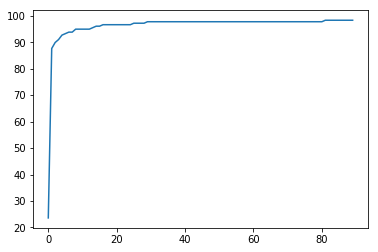

In [12]:
plt.plot(losses)